<a href="https://colab.research.google.com/github/kumarsinghashu/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Seoul Bike Sharing Demand Prediction</u></b>


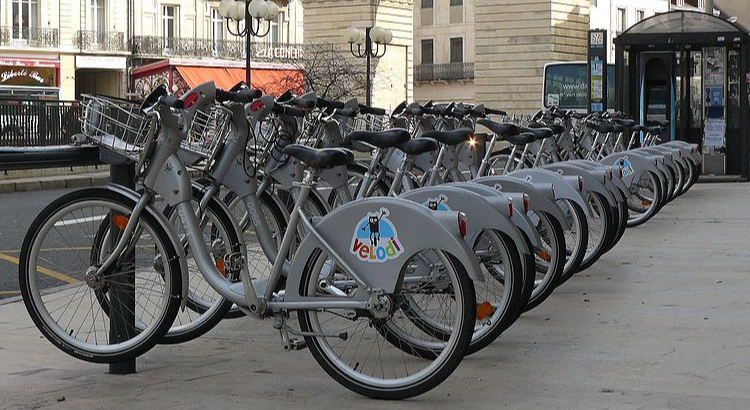

# **<u>Problem Description</u>**
# Currently the rental bikes are introduced in many urban cities for the enhancement of moblility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Description**

##**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

#<b>Attribute Information :</b>


 *  ## Date : year-month-day

 * ## Rented Bike count - Count of bikes rented at each hour

* ## Hour - Hour of he day

* ## Temperature-Temperature in Celsius

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Dew point temperature - Celsius

* ## Solar radiation - MJ/m2

* ## Rainfall - mm

* ## Snowfall - cm

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


   




# <b> <u>Importing Essential libraries</u></b>


In [1]:
# Importing Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

##<b> <u>Mount Drive, Giving.csv file location and Reading the .csv file</b></u>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Bike_df = pd.read_csv('/content/drive/MyDrive/My csv file data/SeoulBikeData.csv', encoding = 'latin')

# <b>Exploring and Understanding more about data</b>
* ## The data set contains 8760 rows and 14 columns.

In [5]:
# Viewing total number of rows and columns by using .shape
Bike_df.shape

(8760, 14)

In [6]:
# Viewing top 5 rows to take a quick look of the data
Bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Viewing the bottom 5 rows to take a quick look of data
Bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Viewing the description of data in dataframe
Bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
# Getting all the columns
print("Features of dataset")
Bike_df.columns

Features of dataset


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Checking the data set in berif
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
# Viewing the unique value
Bike_df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
# Looking for the description of the dataset to get insights of the data.
Bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


*  Day have 24 hours or we have 365 days in year so if you multiply 365 by 24 so that is equal to 8760, which represents the number of line in dataset.


## <b>Features Description</b>
*  **Date :**  Date of the day, In year there is 365 days(days from 1/12/2017 to 30/11/2018, Formatting is DD/MM/YYYY, type :str, we need to convert into datetime format.  

* **Rented Bike Count :** Number of rented bike in per hour this is our dependent variable, here we need to predict type : int.

* **Hour :** It's more about hour of day, 24 hours, Started from 0-23 in digital time format type : int, Here we convert it into categorical type.

* **Temperature :** Temperature in celsius type: float.

* **Humidity :** Percentage(%) of humidity in air, type : int.

* **wind speed :** wind speed in m/s, type: float.

* **visiblity(10m) :** visibility in m, type :int

* **Dew point temperture :** Morning temperature or the temprature at the starting of day, type : float.

* **Solar Radiation :** Solar Radiation in mj/m2 or sun contribution, type : float.

* **Rainfall :** How much raining in mm, type : float.

* **Snowfall :**  How much snowfall in cm, type : float.

* **season :** Season in years (winter, spring, summer, autmn) , type : str.

* **Holiday :** Holiday or not , type: str.

* **Functioning Day :** This day have function or not, type : str.


# <b> Data Preprocessing</b>
## Steps that are necessary for  Data Preprocessing
* ### Handling  null values/ missing values.
* ### Handling  duplicate values.
* ### Handling  outliers.



# <b>Handling  null values/ missing values.</b>

## In real world seneario there have a lot of missing values and it is a big problem in machine learning because many machine learning algorithm does not support missing values. so that's why handling the missing values in data preprocessing is important.

In [13]:
# Checking there have null/ missing values in each column.
Bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
# Here we seeing the column names, datatype of features, null values, unique values,  and their number of unique values.
df_columns_table=[[name,Bike_df[name].dtypes,Bike_df[name].isnull().sum(),round(Bike_df[name].isnull().sum()/len(Bike_df)*100, 2),
                   Bike_df[name].nunique(),Bike_df[name].unique()] for name in Bike_df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Date,object,0,0.0,365,"[01/12/2017, 02/12/2017, 03/12/2017, 04/12/201..."
1,Rented Bike Count,int64,0,0.0,2166,"[254, 204, 173, 107, 78, 100, 181, 460, 930, 4..."
2,Hour,int64,0,0.0,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,Temperature(°C),float64,0,0.0,546,"[-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7...."
4,Humidity(%),int64,0,0.0,90,"[37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2..."
5,Wind speed (m/s),float64,0,0.0,65,"[2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ..."
6,Visibility (10m),int64,0,0.0,1789,"[2000, 1928, 1996, 1936, 793, 1913, 1687, 1380..."
7,Dew point temperature(°C),float64,0,0.0,556,"[-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19..."
8,Solar Radiation (MJ/m2),float64,0,0.0,345,"[0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01..."
9,Rainfall(mm),float64,0,0.0,61,"[0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ..."


**Thankfully Here i see there is no null and missing values in dataset.**

# <b>Handling Duplicate values</b>

###Duplicate values are values that contain more rows of values and columns have same or duplicates values. The occurrence of duplicate values in datasets is one of the most prevalent problems with data quality. duplicate can result in bias and inaccuracies. So to maintain accuracy and avoid misleading statistics it's important to remove the duplicates from dataset.

In [15]:
duplicate_value=len(Bike_df[Bike_df.duplicated()])
print("The number of duplicate values in the dataset is = ",duplicate_value)

The number of duplicate values in the dataset is =  0


* **Here i found there is no duplicate value are present in dataset.**

* **Date column is object type so it means it's read as a string type. Date column is play a dominant role to analyze the user behaviour. So it's important to convert into datetime format after converting we split into three column('year', 'month', 'day' in as category type.**

# Breaking the date  column

In [16]:
# Swaping the "Date" column into "year", "month", "day".
Bike_df['Date'] = Bike_df['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [17]:
Bike_df['year'] = Bike_df['Date'].dt.year
Bike_df['month'] = Bike_df['Date'].dt.month
Bike_df['day'] = Bike_df['Date'].dt.day_name()

In [18]:
# Here i create a new column of "weekdays_weekend" and drop the column "Date", "Day", "Year"
Bike_df['weekdays_weekend']=Bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Bike_df=Bike_df.drop(columns=['Date','day','year'],axis=1)

In [19]:
Bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [20]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [21]:
Bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

# Changing the data type

* **Here "Hour", "Month", "weekdays_weekend" are be seen as integer data type but in actual its a categorical data type. So it's important to convert into categorical type and if i don't convert it so in further analysis and correlated you not get actual values so that's why it's important to convert it on categorical type.**

In [22]:
# Converting the column  to categorical type.
col=['Hour','month','weekdays_weekend']
for col in col:
  Bike_df[col]=Bike_df[col].astype('category')

In [23]:
# Seeing the data type
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

# <b>EDA(Exploratory Data Analysis)

## <b>Univariate Analysis</b> -

Where data is analyzing with 1 variable

# <b>Bivariate Analysis</b>

## Where data is analyze with 2 variables.


## <b>Multivariate Analysis</b>
Where Data  analyze with mutliple variable.




 Let's Perform EDA to investigate the data and summarize the insight


###  **Rented bike count on holiday and non holiday.**

In [24]:
df_holiday = Bike_df.groupby('Holiday').sum()['Rented Bike Count']
df_holiday

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

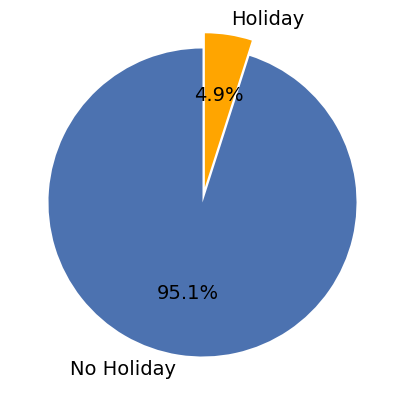

In [25]:

plt.rcParams['figure.figsize'] = 5,5
labels = Bike_df['Holiday'].value_counts().index.tolist()
sizes = Bike_df['Holiday'].value_counts().tolist()
explode = (0, 0.1)
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

Rented bike count is higher on non-holiday.

### **Rented bike count on season.**

In [26]:
by_season= Bike_df.groupby('Seasons').sum()
by_season

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,
Autumn,1790002,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0
Spring,1611909,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0
Summer,2283234,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0
Winter,487169,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6


 **For more better visulization checking the percent counts of the season**

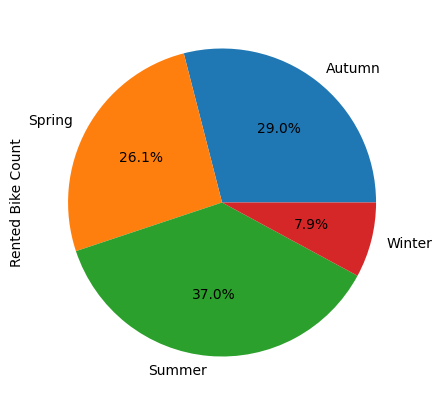

In [27]:
by_season['Rented Bike Count'].plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(5, 5));

**In summer season rented bike count is higher.**

### **Rented bike count in respective month.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

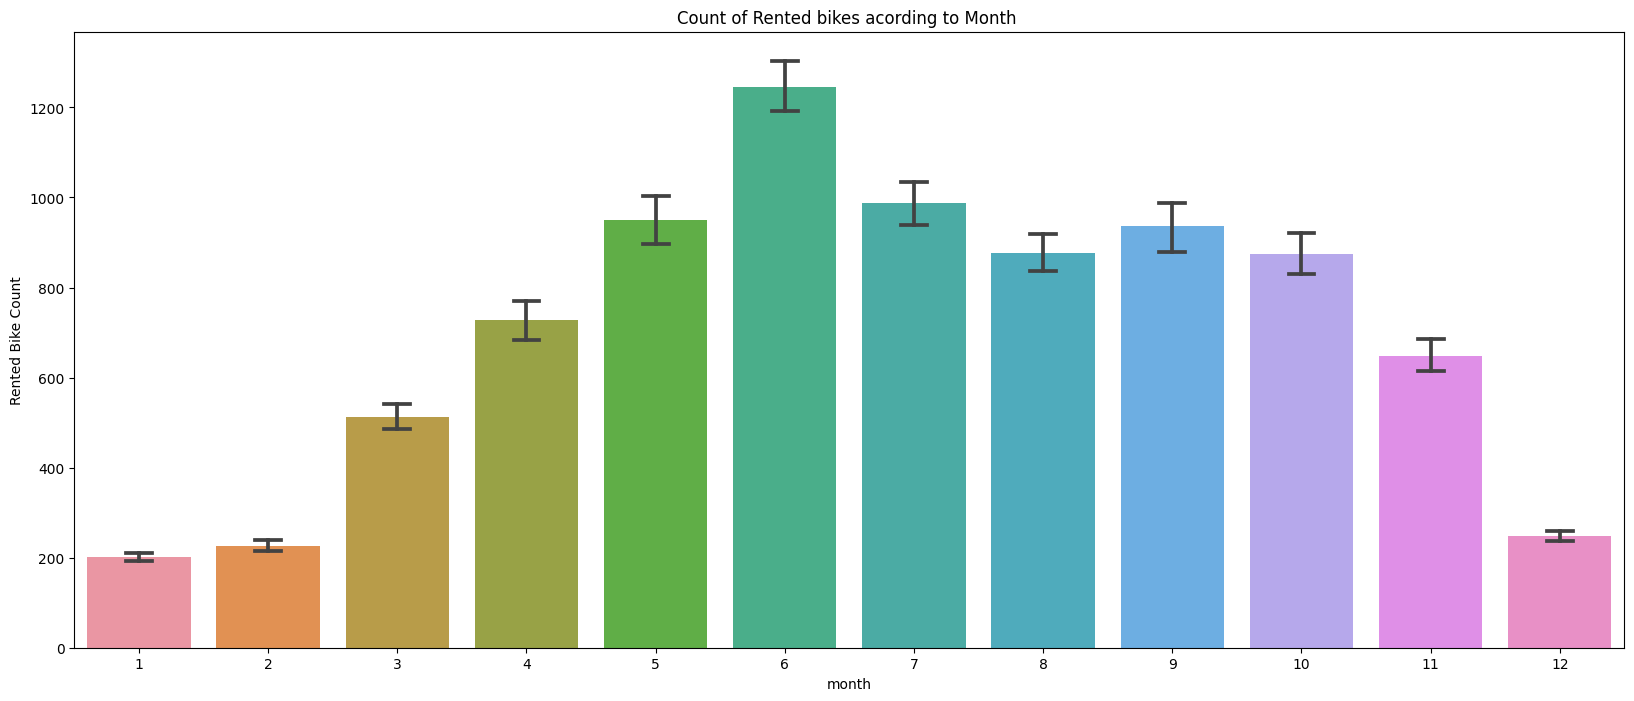

In [28]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

**From the above bar plot visualization in 5 to  10 month have higher demand of rented bike or in June, little bit much higher or in January and Febuarary have less demand.**

### <b>Count of Rented Bike According to Hour</b>

[Text(0.5, 1.0, 'Count of Rented Bike According to Hour')]

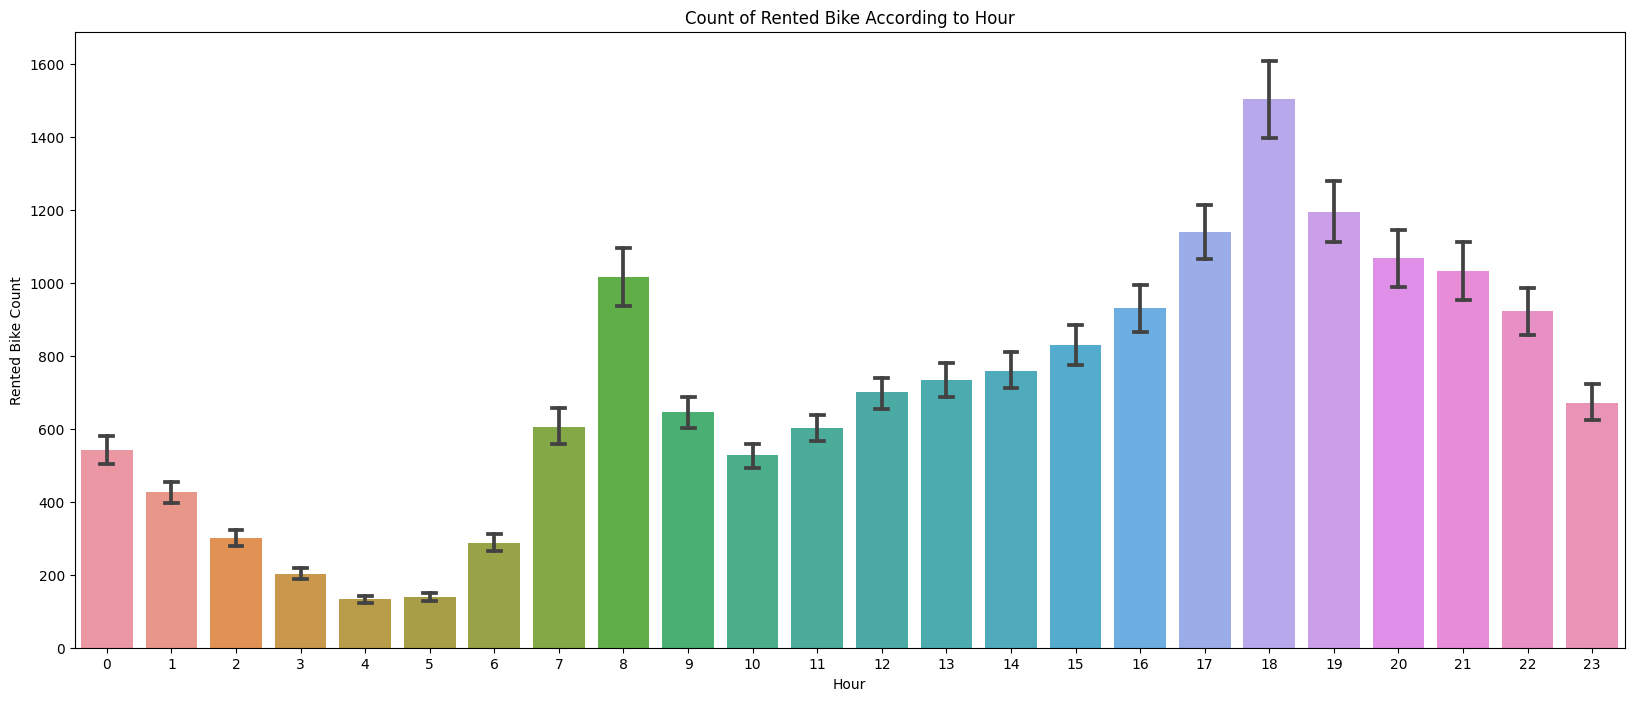

In [29]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented Bike According to Hour')

**This visulization shows about uses of Rented Bike for all over the year, in which Bikes are higher demanded at 7am to 9am and 5pm to 7pm  because of working Hours.**

###<b>Count of rented bike on weekdays and weekend days</b>

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekend days')]

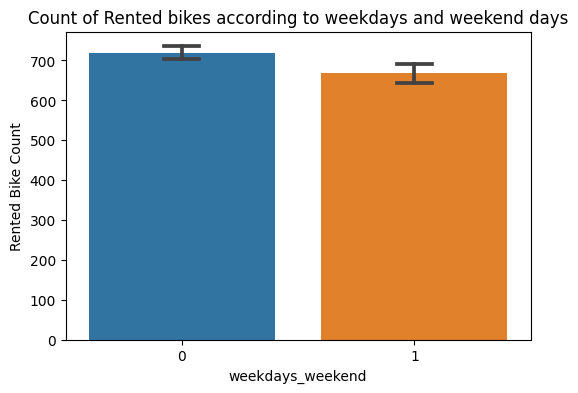

In [30]:
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=Bike_df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=0.15)
ax.set(title='Count of Rented bikes according to weekdays and weekend days')

[Text(0.5, 1.0, 'Count of Rented Bike according to weekdays_weekend')]

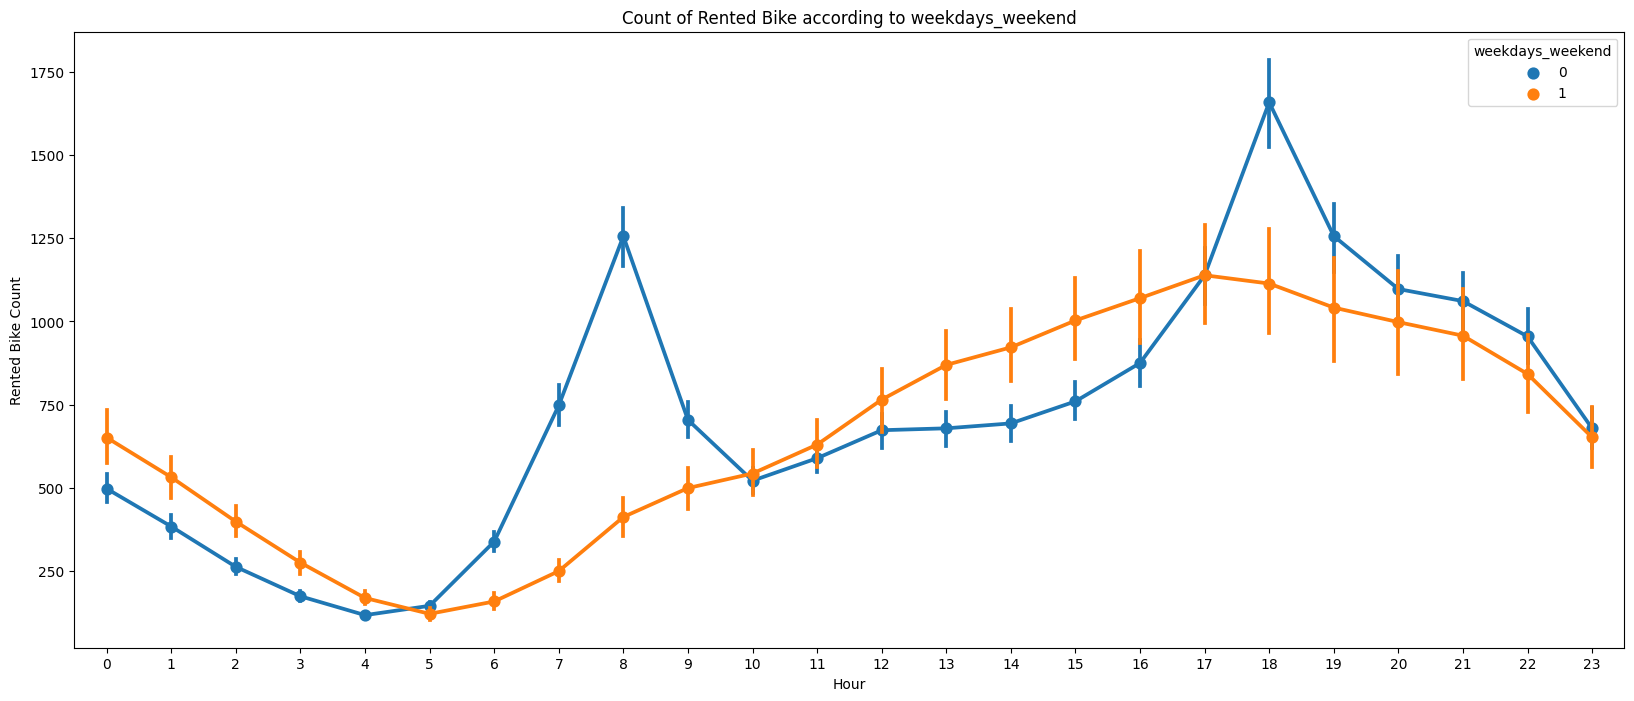

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike_df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented Bike according to weekdays_weekend')

**Here we visualize that the week days show the demand of the bike is little bit higher because it is a office time. That are shown on blue colour.**

### <b>Count Plot for Functioning Day.</b>

[Text(0.5, 1.0, 'Count for rental bike according to Functioning Day')]

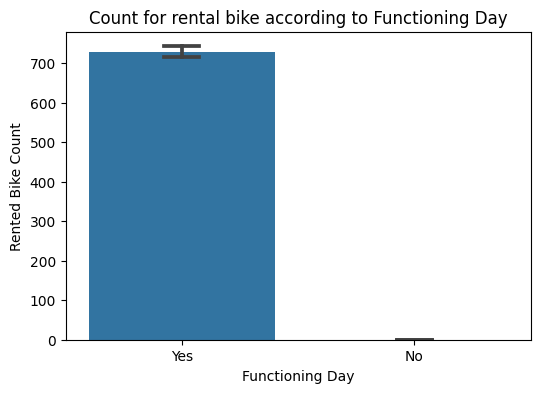

In [32]:
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=Bike_df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=0.15)
ax.set(title='Count for rental bike according to Functioning Day')

**From the barplot is shows that Rented bike is used in Functioning Day and it might not be used in non-functioning day**.

## <b>Numerical Features</b>

* Numerical features are continous values that can be measured on a scale or the numbers that describe an object's various properties.

### <b>Why ?</b>
* In machine learning, vectorization converts the textual data into numerical data. It's a crucial task because machine learning technques can't be used directly on text, as they only support numerical input.

In [33]:
# Assign the numerical column to variables
numerical_columns=list(Bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

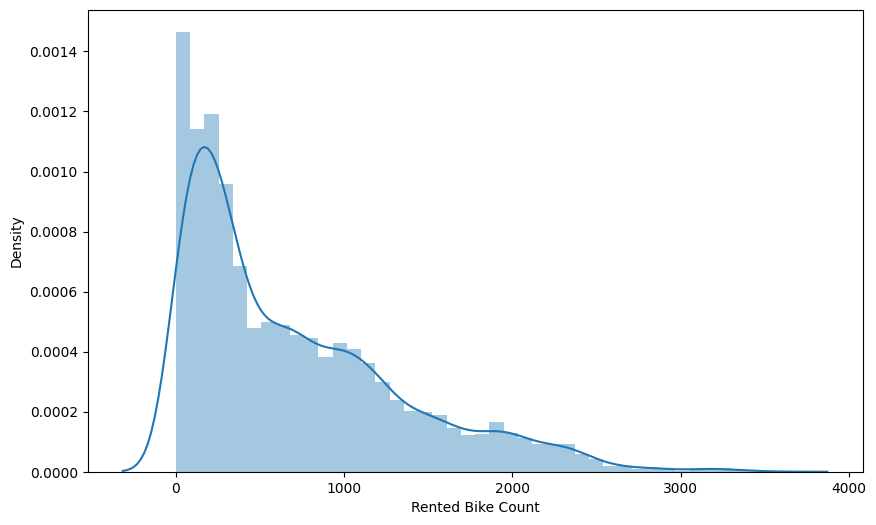

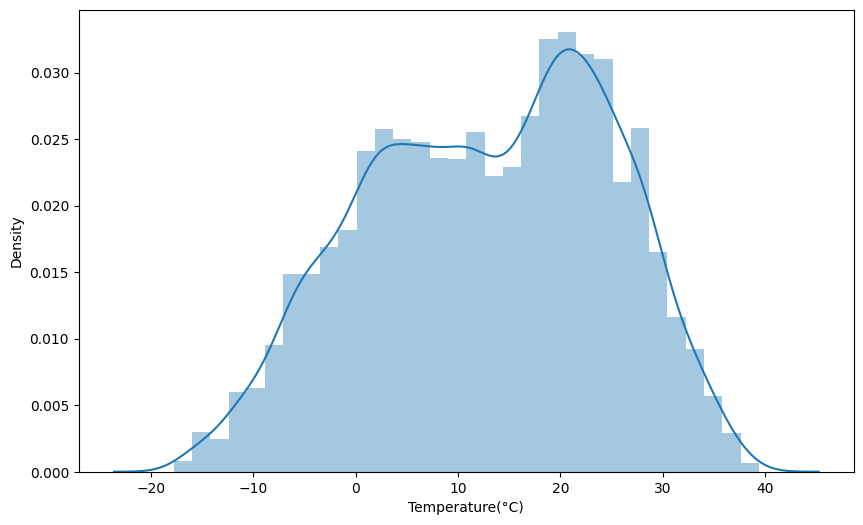

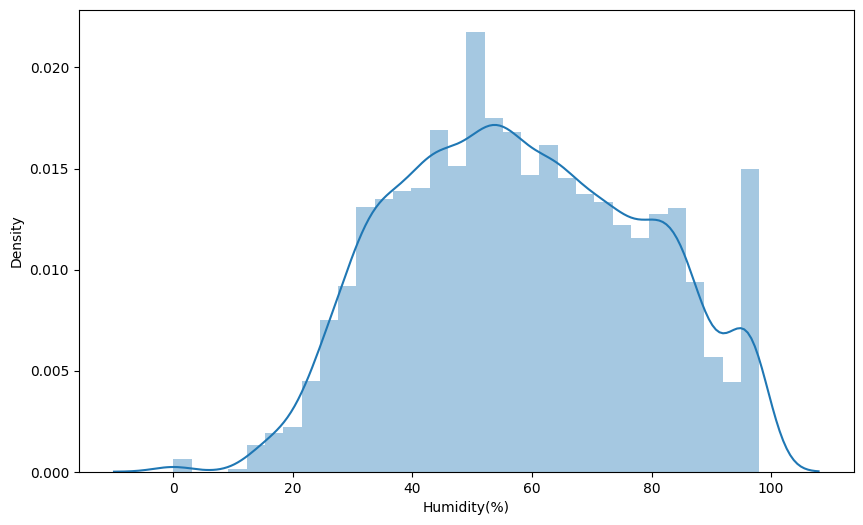

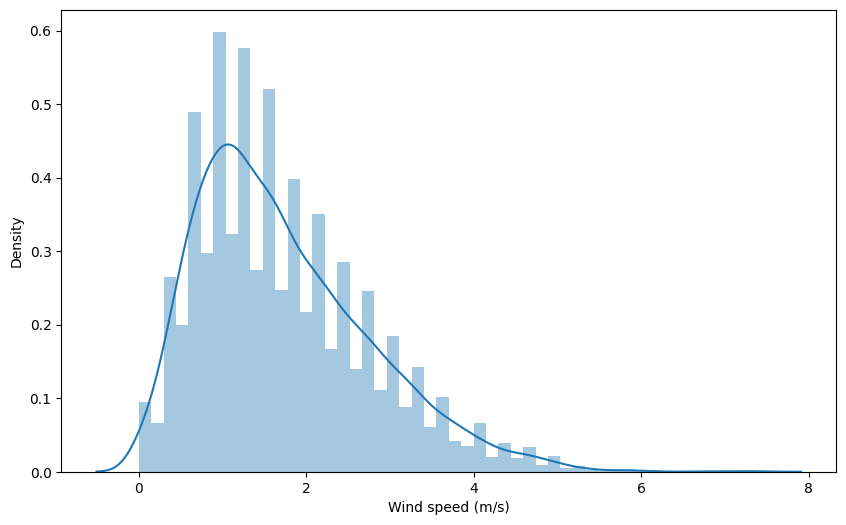

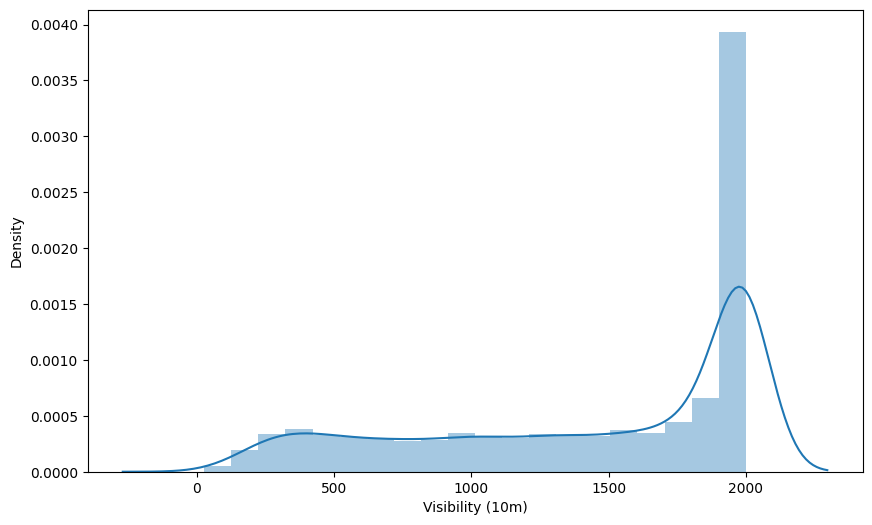

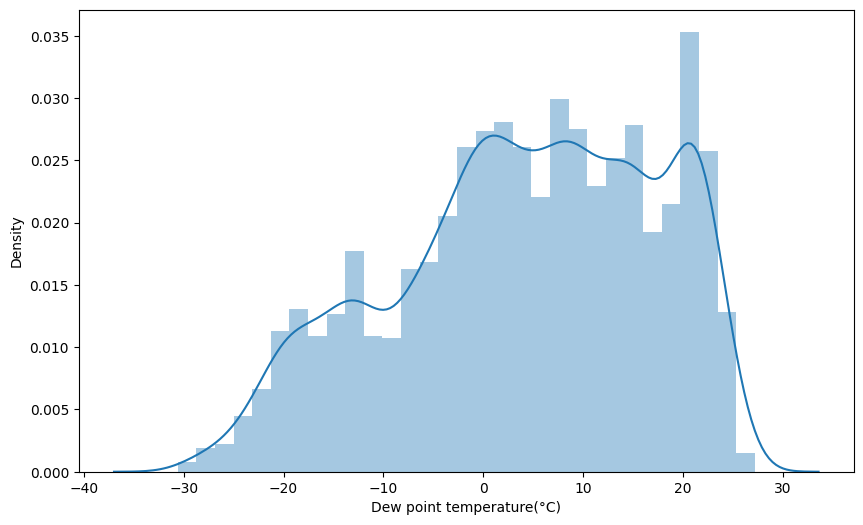

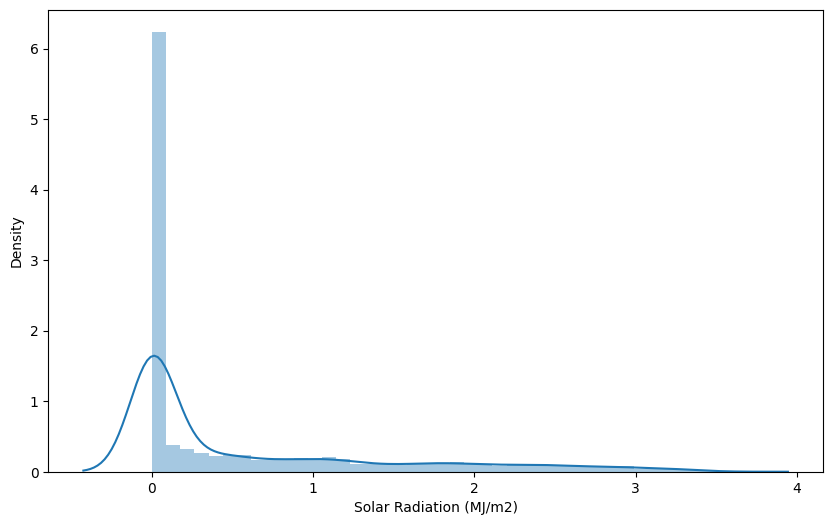

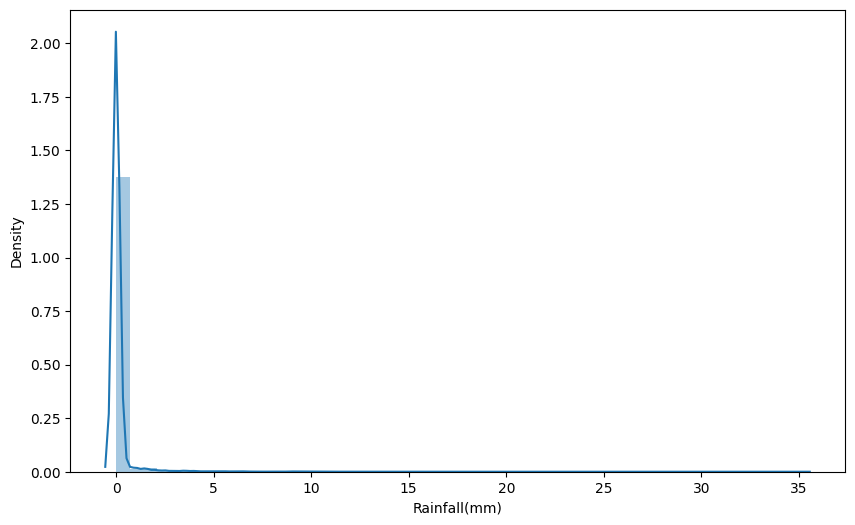

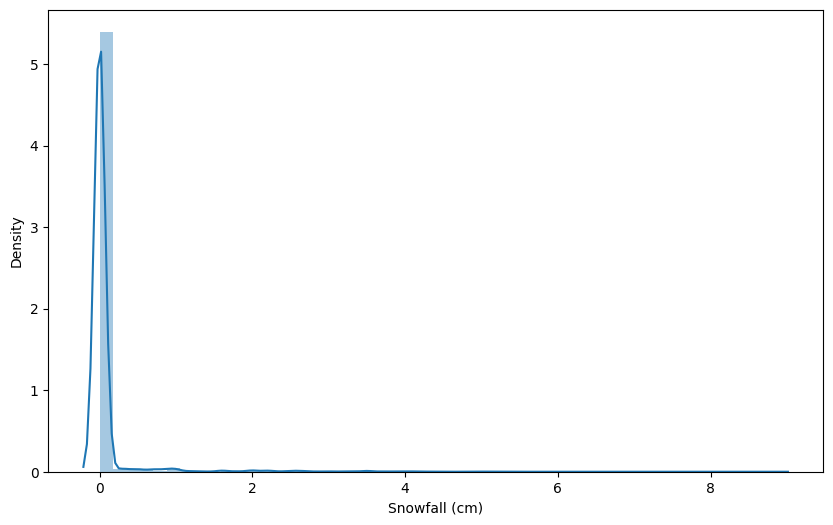

In [34]:
# Here we see the distribution of all numerical features of dataframe.
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=Bike_df[col])
  plt.xlabel(col)
plt.show()


# <b>Bivariate Analysis</b>

## Where data is analyze with 2 variables.


### **Rented bike count as per hour, holidays, seasons, functional days.**

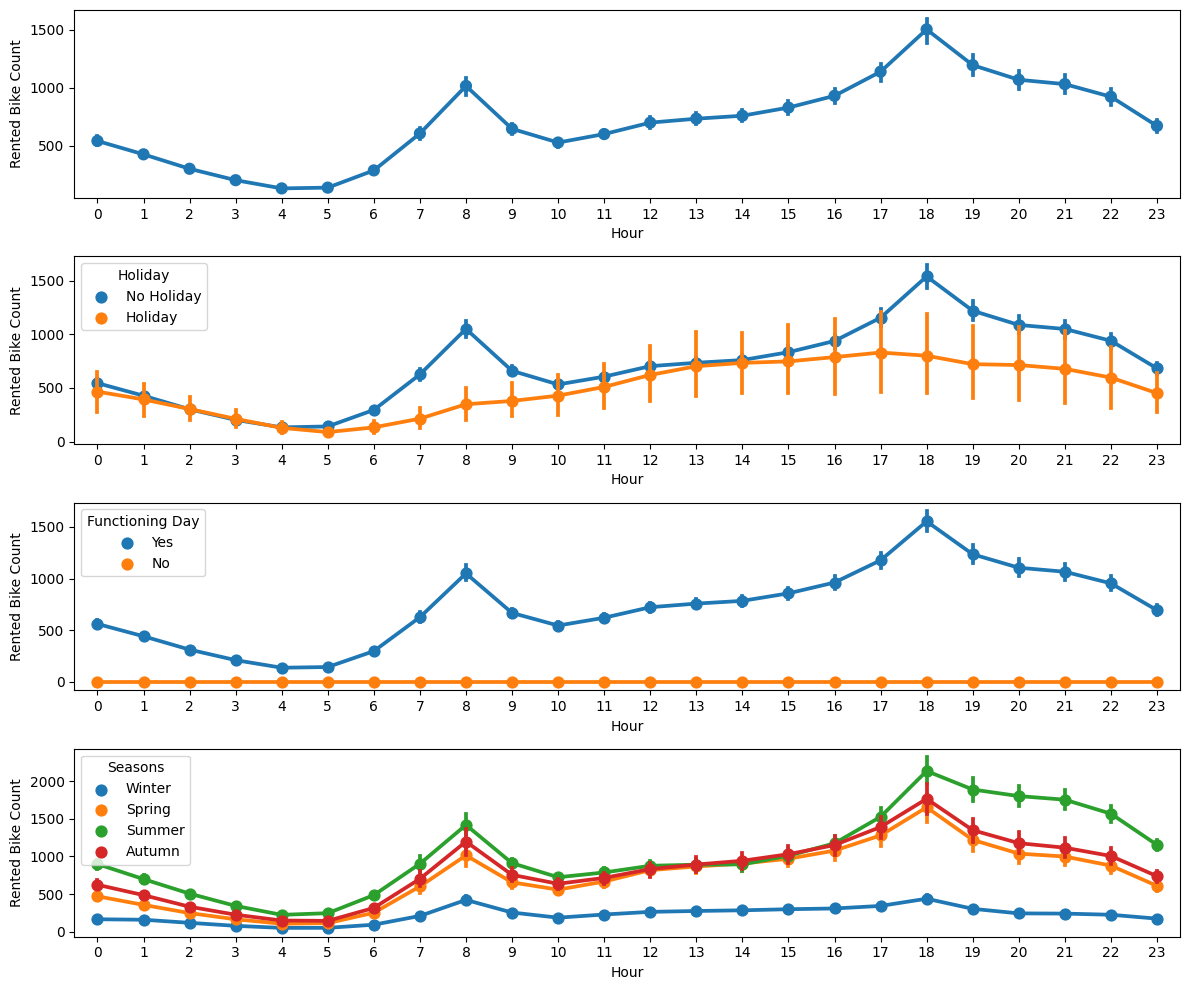

In [35]:


fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Holiday")
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[2],
              hue="Functioning Day")
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[3],
              hue="Seasons")
plt.tight_layout()

1) **On the behalf of hour, the plot shows at 8th hour and 18th hour have maximum bookings.**

2) **2nd plot shows the relation between the holiday and non-holiday on hourly basis.**

3) **4th plot shows the data of relation between hourly and seasonly basis.**

### **Relation between Temperature and Rental Bike Count**

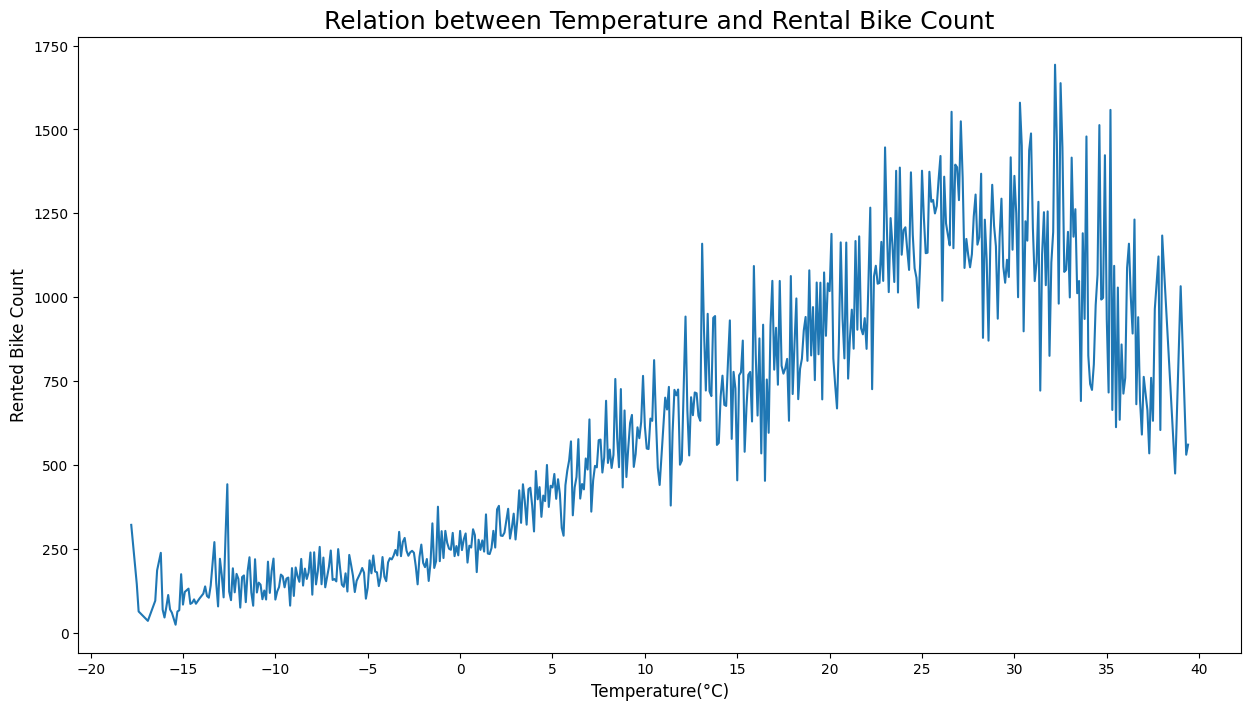

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df_t = Bike_df.groupby('Temperature(°C)').agg({'Rented Bike Count': 'mean'}).reset_index()

plt.rcParams['figure.figsize'] = 15, 8
sns.lineplot(data=df_t, x='Temperature(°C)', y='Rented Bike Count')
plt.xticks(np.arange(-20, 45, 5))
plt.xlabel('Temperature(°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count', fontsize=18)

plt.show()  # Display the plot


**From the above line chart, It shows that when a temperature are modest around 25 to 35 degree celcius there have a  higher demand for rented bike.**

### **Regression Plot**

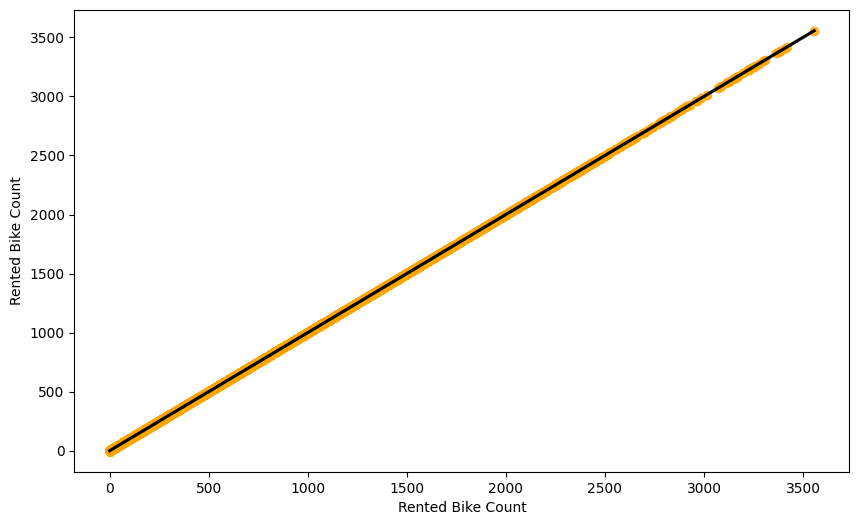

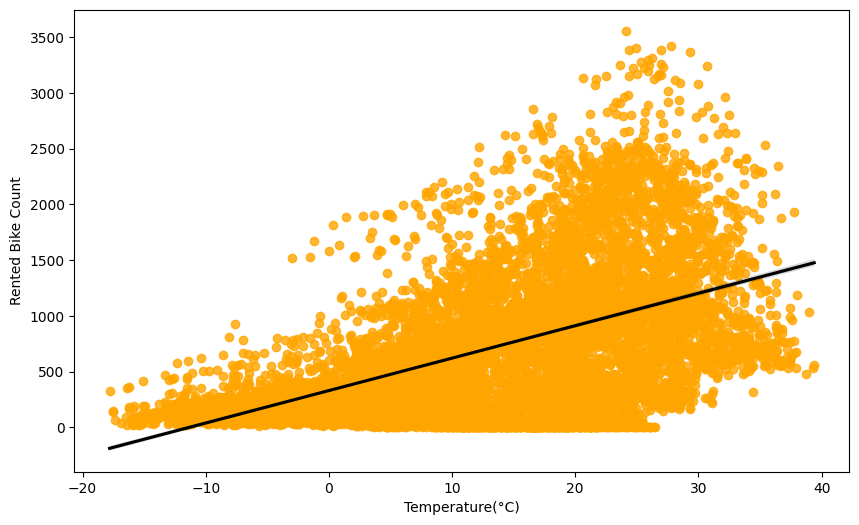

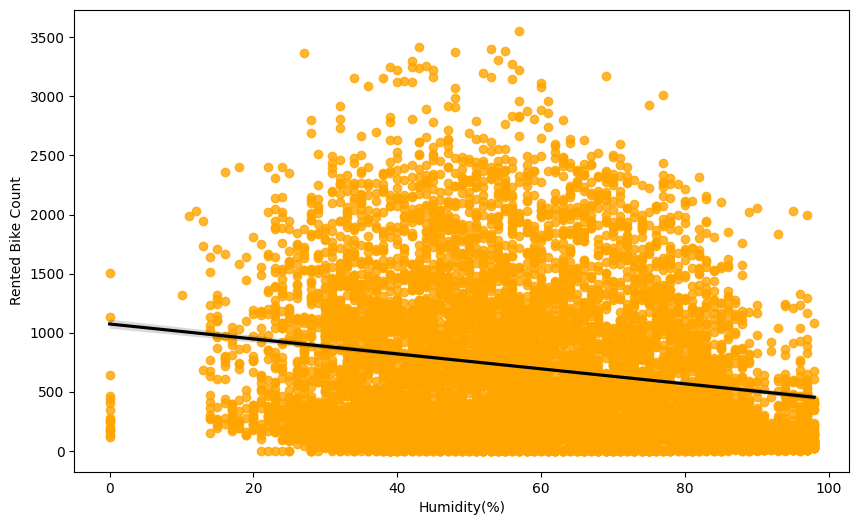

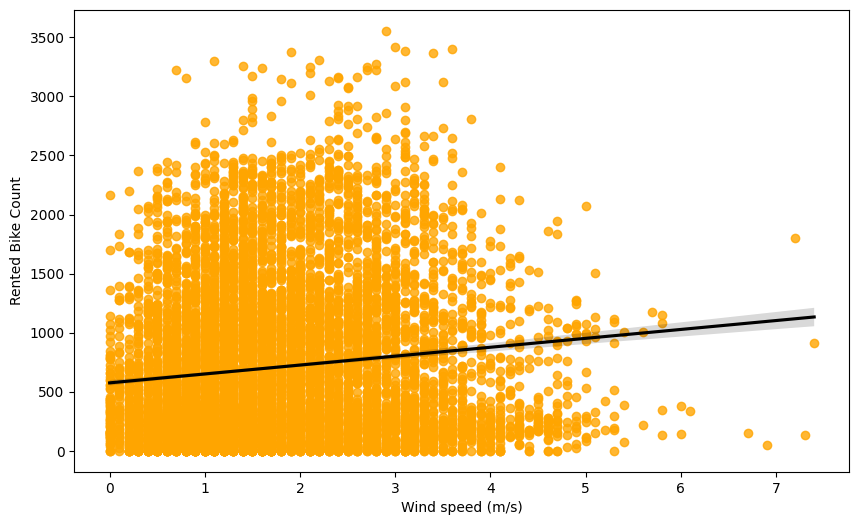

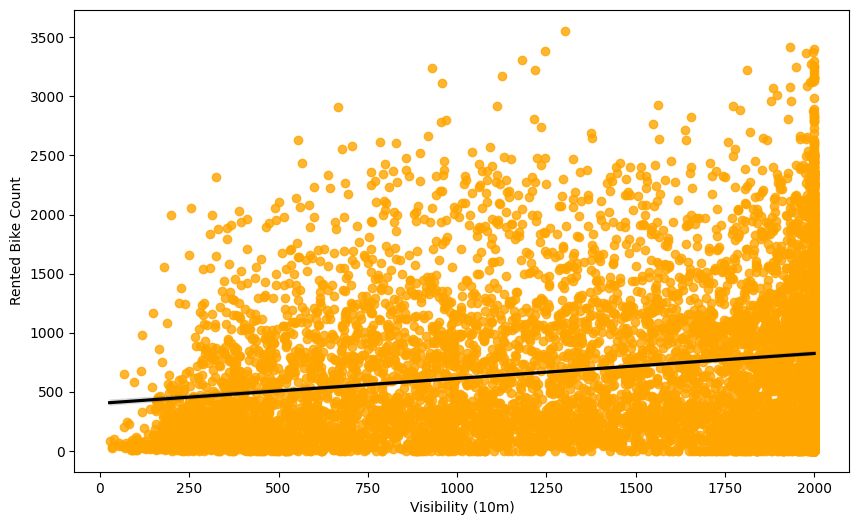

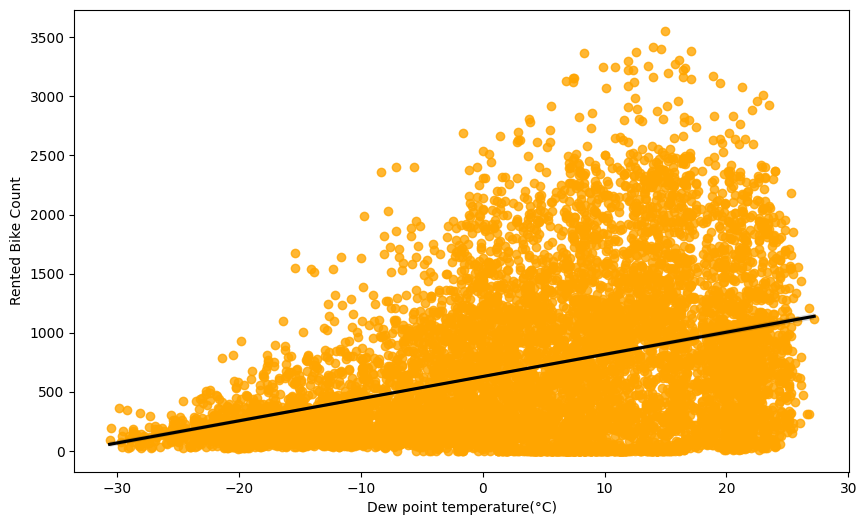

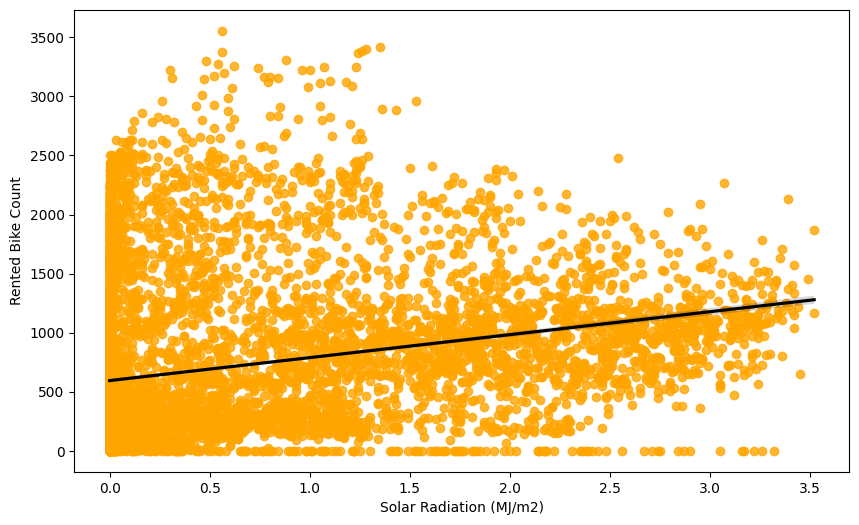

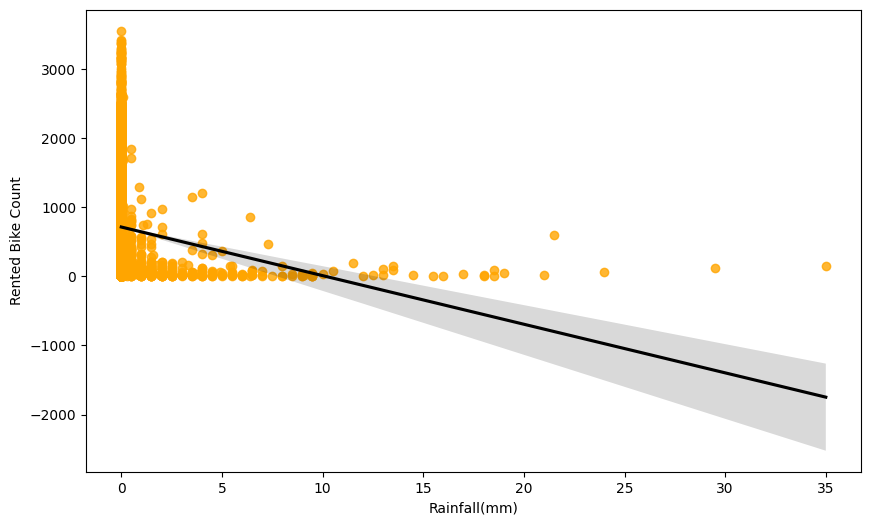

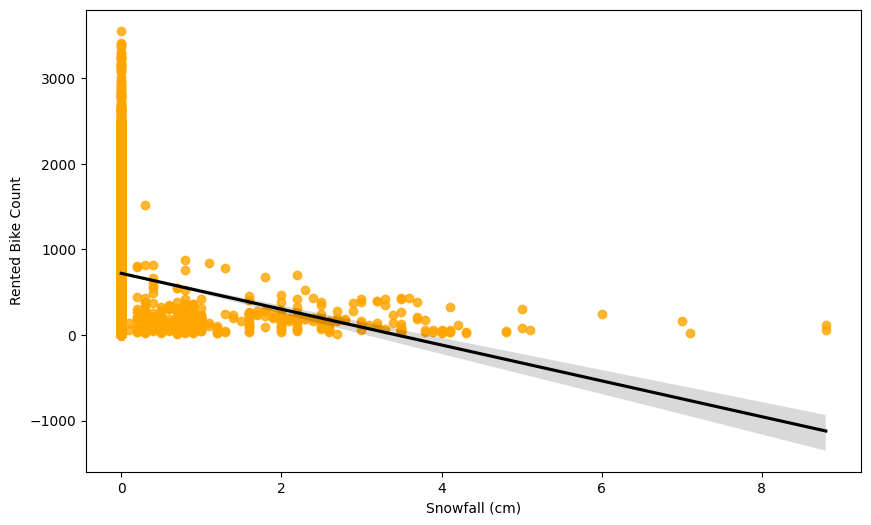

In [37]:
# Regression plot for all the numerical features.
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=Bike_df[col],y=Bike_df['Rented Bike Count'],scatter_kws={"color":'orange'}, line_kws={"color":'black'})

 * **The above regression plot for all the numerical features here we see that the columns "Temperature", "wind speed",  "visibility", "Dew point temperature", "Solar Rdiation" are positively relation to the target variable.**

*  **Which means rented bike count increases with increment on these features.**

* **"Ranifall", "Snowfall", "Humidity" these features are negatively related to the target variable which means that rented bike count decreases when these features are increases.**


# <b>Feature Engineering</b>



### **Normalizing the Rented Bike Count column data.**

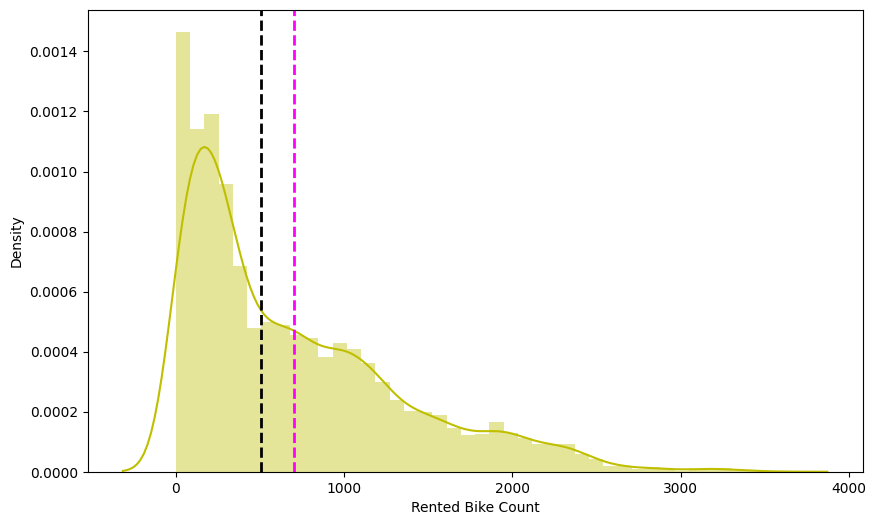

In [38]:
# Distribution plot for Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(Bike_df['Rented Bike Count'], hist=True ,color="y")
ax.axvline(Bike_df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(Bike_df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()


**This graph shows that Rented Bike Count has moderate right skewness. However, since the assumption for linear regression is that dependent variables distribution should be normal, we need to apply some transformation to make it normal.**

<Axes: xlabel='Rented Bike Count', ylabel='Rented Bike Count'>

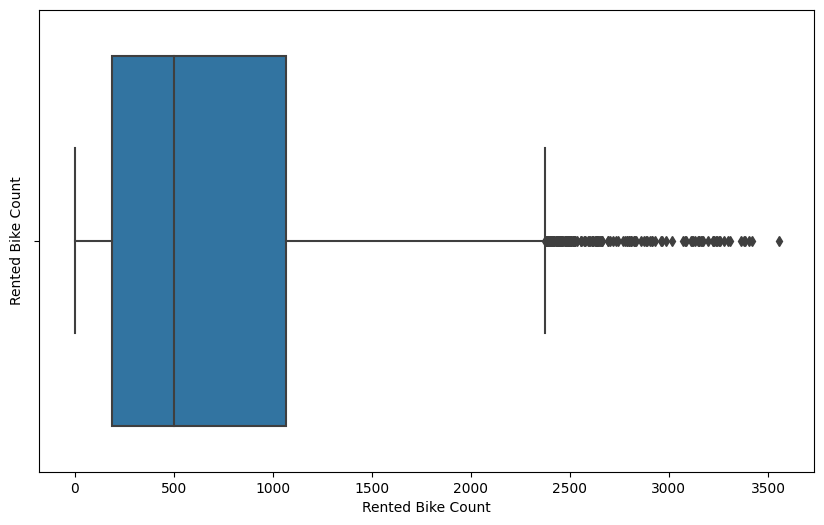

In [39]:
#Box plot for Rented Bike Count for checking outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=Bike_df['Rented Bike Count'])


* **From the above boxplot we have detect outliers in Rented Bike  Count Column.**

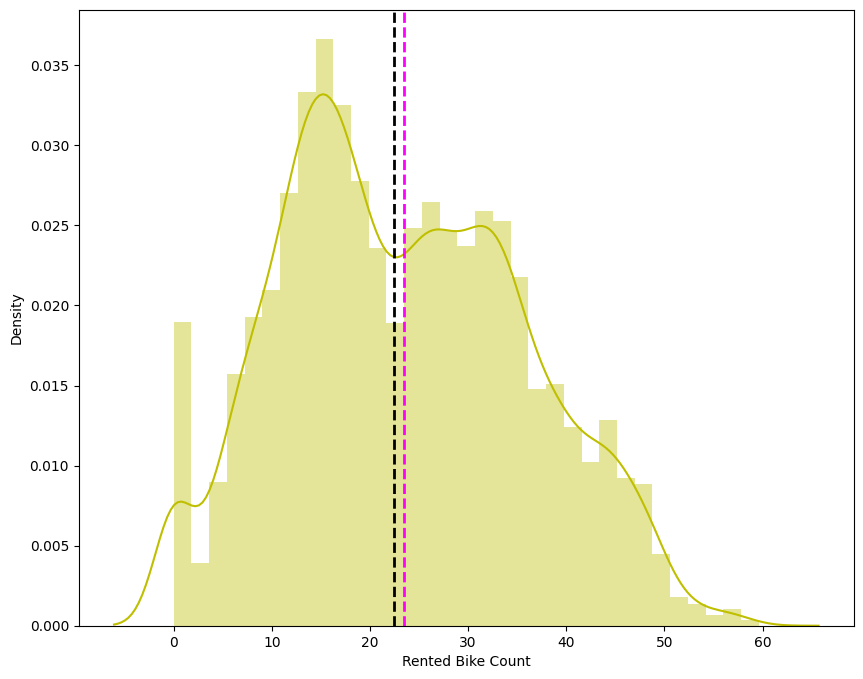

In [40]:
# Here we applying square root to Rented Bike Count to improve skewness.
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(Bike_df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(Bike_df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(Bike_df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)


* **Here we applying the generic rule of taking the square root of skewed variables in order to make it normal, So here we got after applying square root transformation to square root to the skewed Rented Bike count, So here we got almost normaal distribution.**

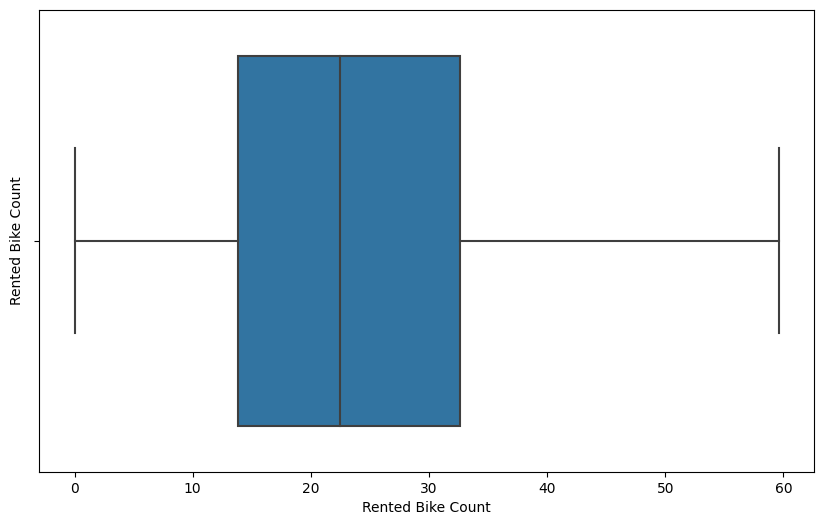

In [41]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(Bike_df['Rented Bike Count']))
plt.show()

**After applying square root transformation to Rented Bike Count column, We found that there is no outliers are present.**

## <b>Checking of Correlation between variables</b>

### **Checking in OLS Model**
**Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent variables and a dependent variable.**

In [42]:
# Importing the module
# Assign the 'X' and 'Y' value
# Checking in OLS Model
import statsmodels.api as sm
X = Bike_df[[ 'Temperature(°C)',	'Humidity(%)',
             'Wind speed (m/s)',	'Visibility (10m)', 	'Dew point temperature(°C)',
              'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']]
Y = Bike_df['Rented Bike Count']
Bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [43]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [44]:
# Here we fit the OLS Model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:14:00   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature(°C)              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity(%)                 -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind speed (m/s)             52.4810      5.661      9.271      0.000      41.385      63.577
Visibility (10m)             -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew point temperature(°C)    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar Radiation (MJ/m2)    -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall(mm)                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall (cm)                41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R squared and Adjusted R squared are closest to each other, 40% of variance in the Rented Bike Count are describe by model.**

* **For F statistic, P value is less than 0.05 for 5% of significance level.**

* **P value of Dew Point Temperature and Visibility are extremely high and they are not significant.**

* **The Omnibus test examine the skewness and kurtosis of residuals, and in this case, In this case the omnibus value is high and it display their have skewness in data.**

*  **The condition number is large, 3.11e+04, suggests that there may be strong multicollinearity or other numerical issues.**

*  **The Durbin-Waston test is used to detect autocorrelation among variables, and in this case, the value is less than 0.5, That indicates there have postive autocorrelation among the variables.**

In [45]:
X.corr()

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(°C),NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* **On the OLS model, Here we found that there is high coorelation between "Temperature" and "Dew Point Temperature" . So here we need to drop one variable.**

* **Here we check the (P>|t|) value for deciding which one i drop. So in table we found that the "Dew Point Temperature" value is high, That's indicate less siginficant, So here we drop Dew Point Temperature Column".**

  
* **To make decision more clear, In next step we draw a heatmap.**


# **HeatMap**

**A correlation heatmap is a graphical representation that shows the correlation matrix, which helps to understand the correlation between different variables.**

<Axes: >

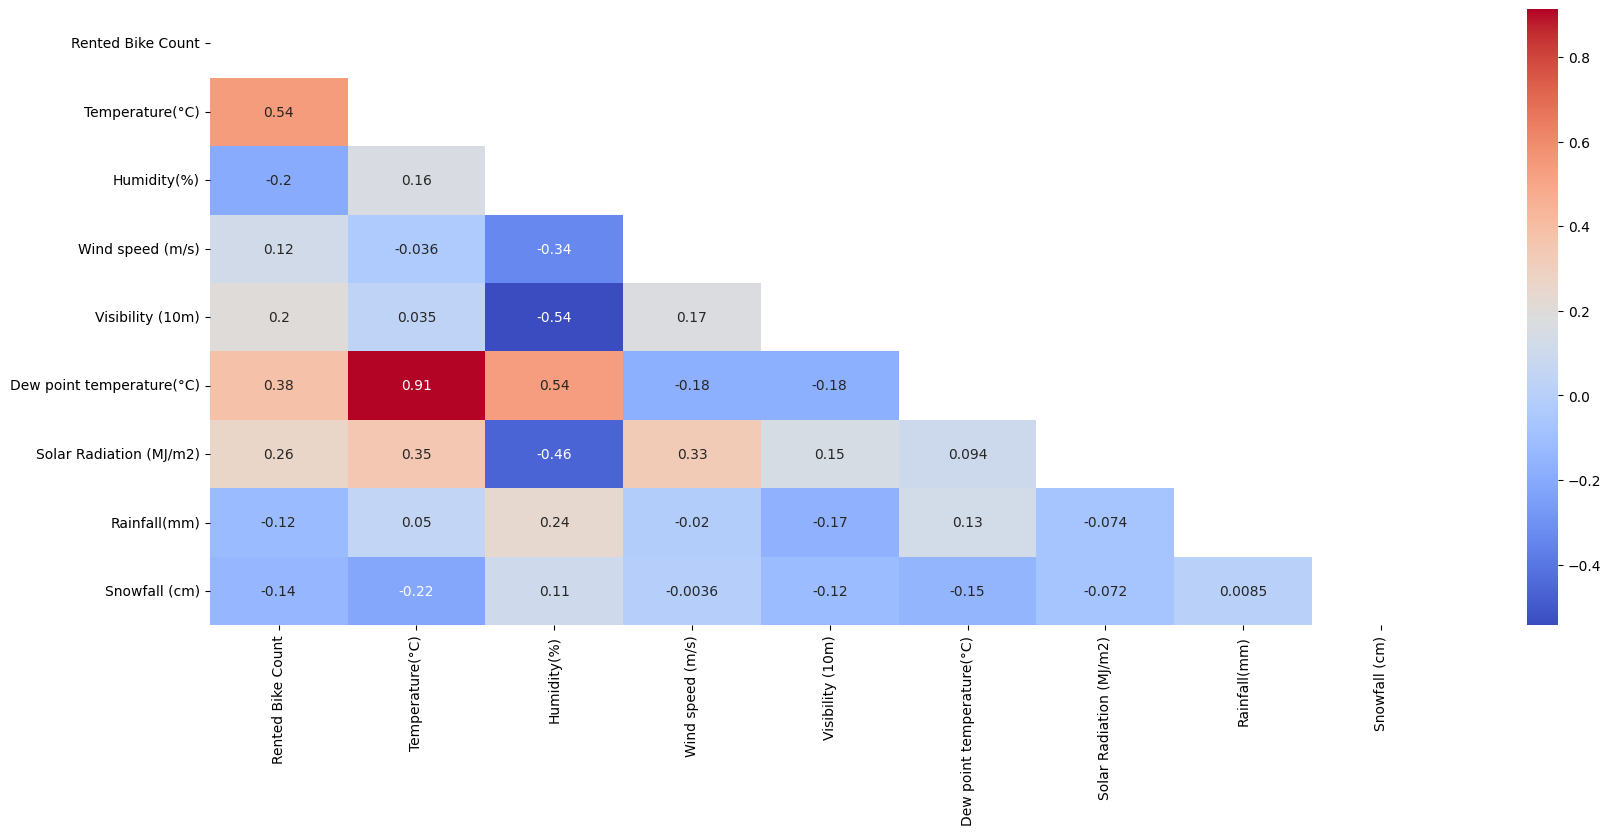

In [46]:
plt.figure(figsize=(20,8))
correlation=Bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

**In the heatmap we can observe that the target variable line the most positively correlated variables to the rent are :**

 * the temperature

 * the dew point temperature

 * the solar radiation.

**And most negatively coorelated are :**

 * Humidity

 * Rainfall


Based on Correlation heatmap, Here we observe the correlation between columns 'Temperature' and 'Dew point temperature' is 0.91 so here if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so here we can drop the column 'Dew point temperature(°C).

In [47]:
# Droping the "Dew point temperature"  column.
Bike_df=Bike_df.drop(['Dew point temperature(°C)'],axis=1)

In [48]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

In [49]:
# Impute all the categorical features to variable
categorical_features=list(Bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# **One Hot Encoding**

One Hot Encoding is the conversion of categorical information or variables into numerical values that may be fed into machine learning algorithms to improve the prediction accuraccy.

In [50]:
Bike_df_copy = Bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    Bike_df_copy = one_hot_encoding(Bike_df_copy, col)
Bike_df_copy.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# <b>Train and Test Split for Linear Regression</b>

A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test thier accuracy on the unseen testing set.

In [51]:
#Assign the value in X and Y
X = Bike_df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(Bike_df_copy['Rented Bike Count'])

In [52]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [55]:
#Creating test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [56]:
Bike_df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

#<b>Linear Regression</b>


In [57]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [58]:
# check the score
reg.score(X_train, y_train)

0.7722101548255267

In [59]:
# Check the coefficient
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [60]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [61]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189293
RMSE : 5.9226271942350825
MAE : 4.474024092996784
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


**R2 score of model is 0.77, That display our model is able to  captured most of the data variance, So here we should store in dataframe for later comparison.**

In [62]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])


In [63]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318178
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


In [64]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

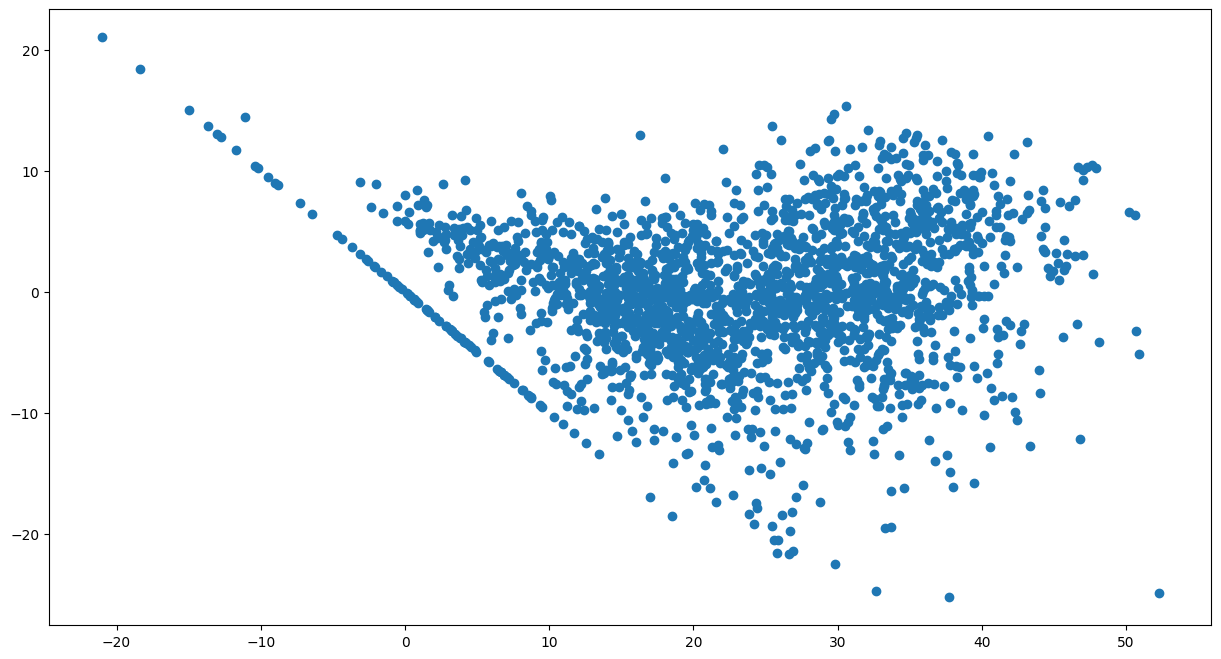

In [65]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

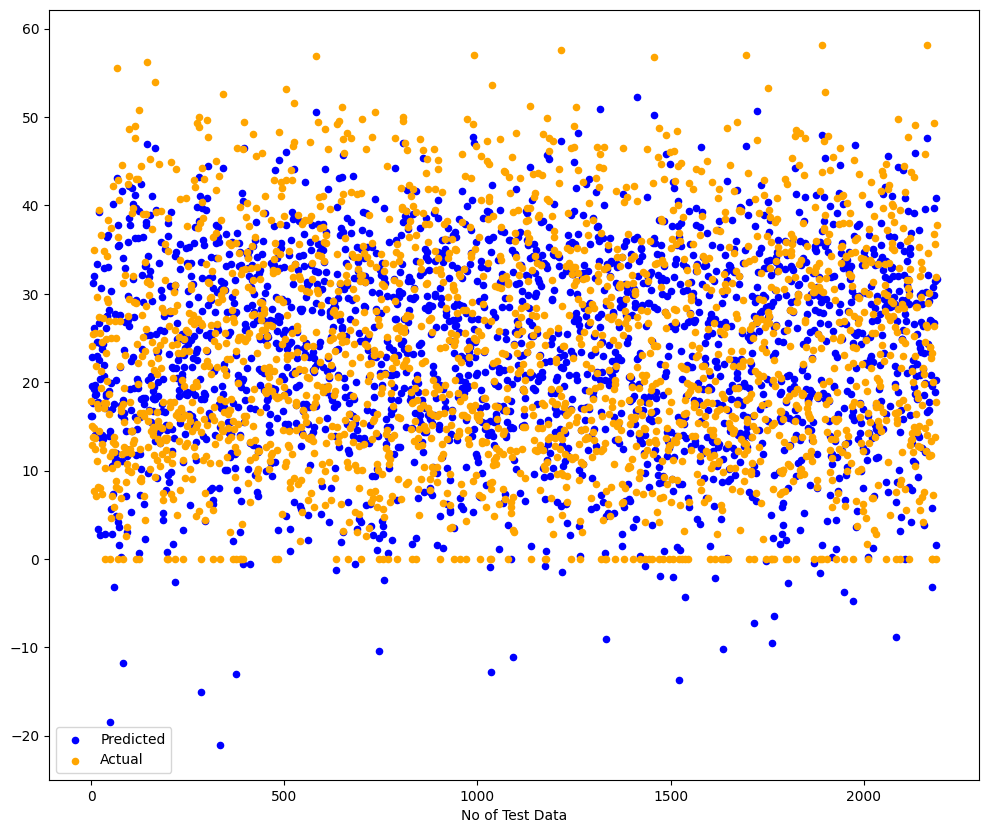

In [68]:
plt.figure(figsize=(12,10))
plt.scatter(range(len(y_pred_test)), y_pred_test, s=20, c='blue', label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='orange', label='Actual')
plt.legend()
plt.xlabel('No of Test Data')
plt.show()